**Carlos Emiliano Mendoza Hernández**

# Red neuronal para clasificar flores Iris

**Numero de capas y neuronas**
- Capa de entrada: 4 neuronas, dado que el dataset tiene 4 características
- Capa oculta 1: 10 neuronas, función de activación ReLU
- Capa oculta 2: 8 neuronas, función de activación ReLU
- Capa de salida: 3 neuronas, función de activación Softmax (clasificación multiclase) para representar la probabilidad de pertenecer a cada clase

**Funciones de activacion**
- ReLU (Rectified Linear Unit): f(x) = max(0, x), se utiliza en las capas ocultas
- Softmax: f(x) = e^x / sum(e^x), se utiliza en la capa de salida para obtener la probabilidad de pertenecer a cada clase

**Funcion de costo**
- Categorical Crossentropy: se utiliza para problemas de clasificación multiclase. Mide la diferencia entre la distribución de probabilidad predicha por el modelo (softmax) y la distribución real de las etiquetas (one-hot encoding)

**Optimizador**
- Adam: algoritmo de optimización que se adapta a la tasa de aprendizaje durante el entrenamiento
- Tasa de aprendizaje: 0.01 (valor por defecto)

**Epocas**
- 50: Se utilizaron 50 epocas para permitir a la red aprender patrones significativos en los datos

**Batch size**
- 16: se utiliza para evitar que el modelo se sobreajuste. Tamaños pequeños permiten actualizaciones más frecuentes, mientras que tamaños grandes requieren más memoria y tienden a estabilizar las fluctuaciones.

**Normalizacion de los datos**
- StandardScaler: garantiza que las características estén en la misma escala, evitando que una domine sobre las otras, lo que acelera la convergencia.

**Procesamiento de los datos**
- OneHotEncoder: convierte las etiquetas de las clases en vectores binarios para que el modelo pueda predecir la probabilidad de pertenecer a cada clase, es necesario para la función de costo Categorical Crossentropy y para la función de activación Softmax.
- train_test_split: divide el dataset en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

Iris dataset

In [12]:
iris = load_iris()
X = iris.data
y = iris.target

Data preprocessing

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

Neural network

In [14]:
# Build model
model = Sequential()
model.add(Dense(10, input_shape=(X.shape[1],),  activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

Epoch 1/50
8/8 [==============================] - 1s 23ms/step - loss: 1.0308 - accuracy: 0.5583 - val_loss: 0.8863 - val_accuracy: 0.7000
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.7777 - accuracy: 0.7500 - val_loss: 0.6390 - val_accuracy: 0.7667
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7417 - val_loss: 0.4678 - val_accuracy: 0.7000
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.4717 - accuracy: 0.7083 - val_loss: 0.3964 - val_accuracy: 0.7667
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.4061 - accuracy: 0.7917 - val_loss: 0.3502 - val_accuracy: 0.8667
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3543 - accuracy: 0.8083 - val_loss: 0.2952 - val_accuracy: 0.9000
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3142 - accuracy: 0.8333 - val_loss: 0.2402 - val_accuracy: 0.9000
Epoch 8/50
8/8 [=================

In [18]:
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_true, y_pred, target_names=iris.target_names))

Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Visualize training history

In [15]:
import matplotlib.pyplot as plt

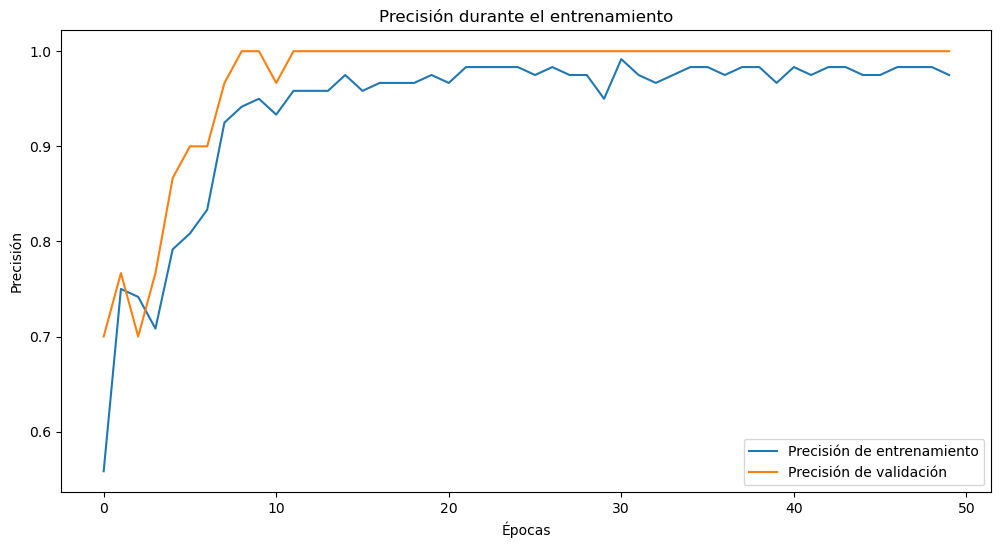

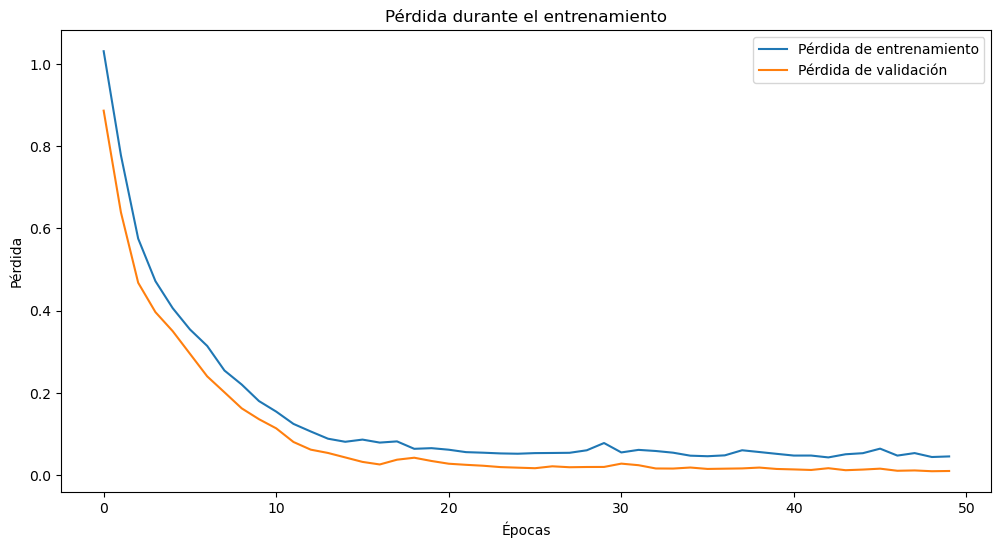

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()